In [ ]:
!pip install PyPDF2
!pip install pdfminer.six
!pip install git+https://github.com/myhub/tr.git@master

     |████████████████████████████████| 81kB 9.5MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61085 sha256=0ef58a3bd02e615f1b512894d7f4c6acb2f60d86972b2bf6cdea719ce7a83ee7
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2
     |████████████████████████████████| 5.6MB 683kB/s 
     |████████████████████████████████| 9.7MB 50.8MB/s 
  Cloning https://github.com/myhub/tr.git (to revision master) to /tmp/pip-req-build-o1uab6a0
  Running command git clone -q https://github.com/myhub/tr.git /tmp/pip-req-build-o1uab6a0
  Created wheel for tr: filename=tr-1.5.0-cp36-none-any.whl size=162873910 sha256=3ad52c6750bb13dbe09efd638bef87743444fe8cb5ec11f3e77190c6afcecba0
  Stored in directory: /tmp/pip-ephem-wheel-cache-yp0zdjzp/wheels/37/2f/58/4a3f351a526c99ce1795792b5d651013ffeb09f8dbed1de230
Successfully built tr


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tr import *
from PIL import Image, ImageDraw, ImageFont,ImageEnhance

In [ ]:
img_pil = Image.open("/content/ocrs.png")
MAX_SIZE = 2000
if img_pil.height > MAX_SIZE or img_pil.width > MAX_SIZE:
    scale = max(img_pil.height / MAX_SIZE, img_pil.width / MAX_SIZE)

    new_width = int(img_pil.width / scale + 0.5)
    new_height = int(img_pil.height / scale + 0.5)
    img_pil = img_pil.resize((new_width, new_height), Image.BICUBIC)

print(img_pil.width, img_pil.height)
#work(img_pil)

2000 1419


In [ ]:
def work(img):
  enhancer = ImageEnhance.Contrast(img).enhance(1.2)
  enhancer2 = ImageEnhance.Sharpness(enhancer).enhance(3.6)
  return enhancer2.save("Image_saved.png")

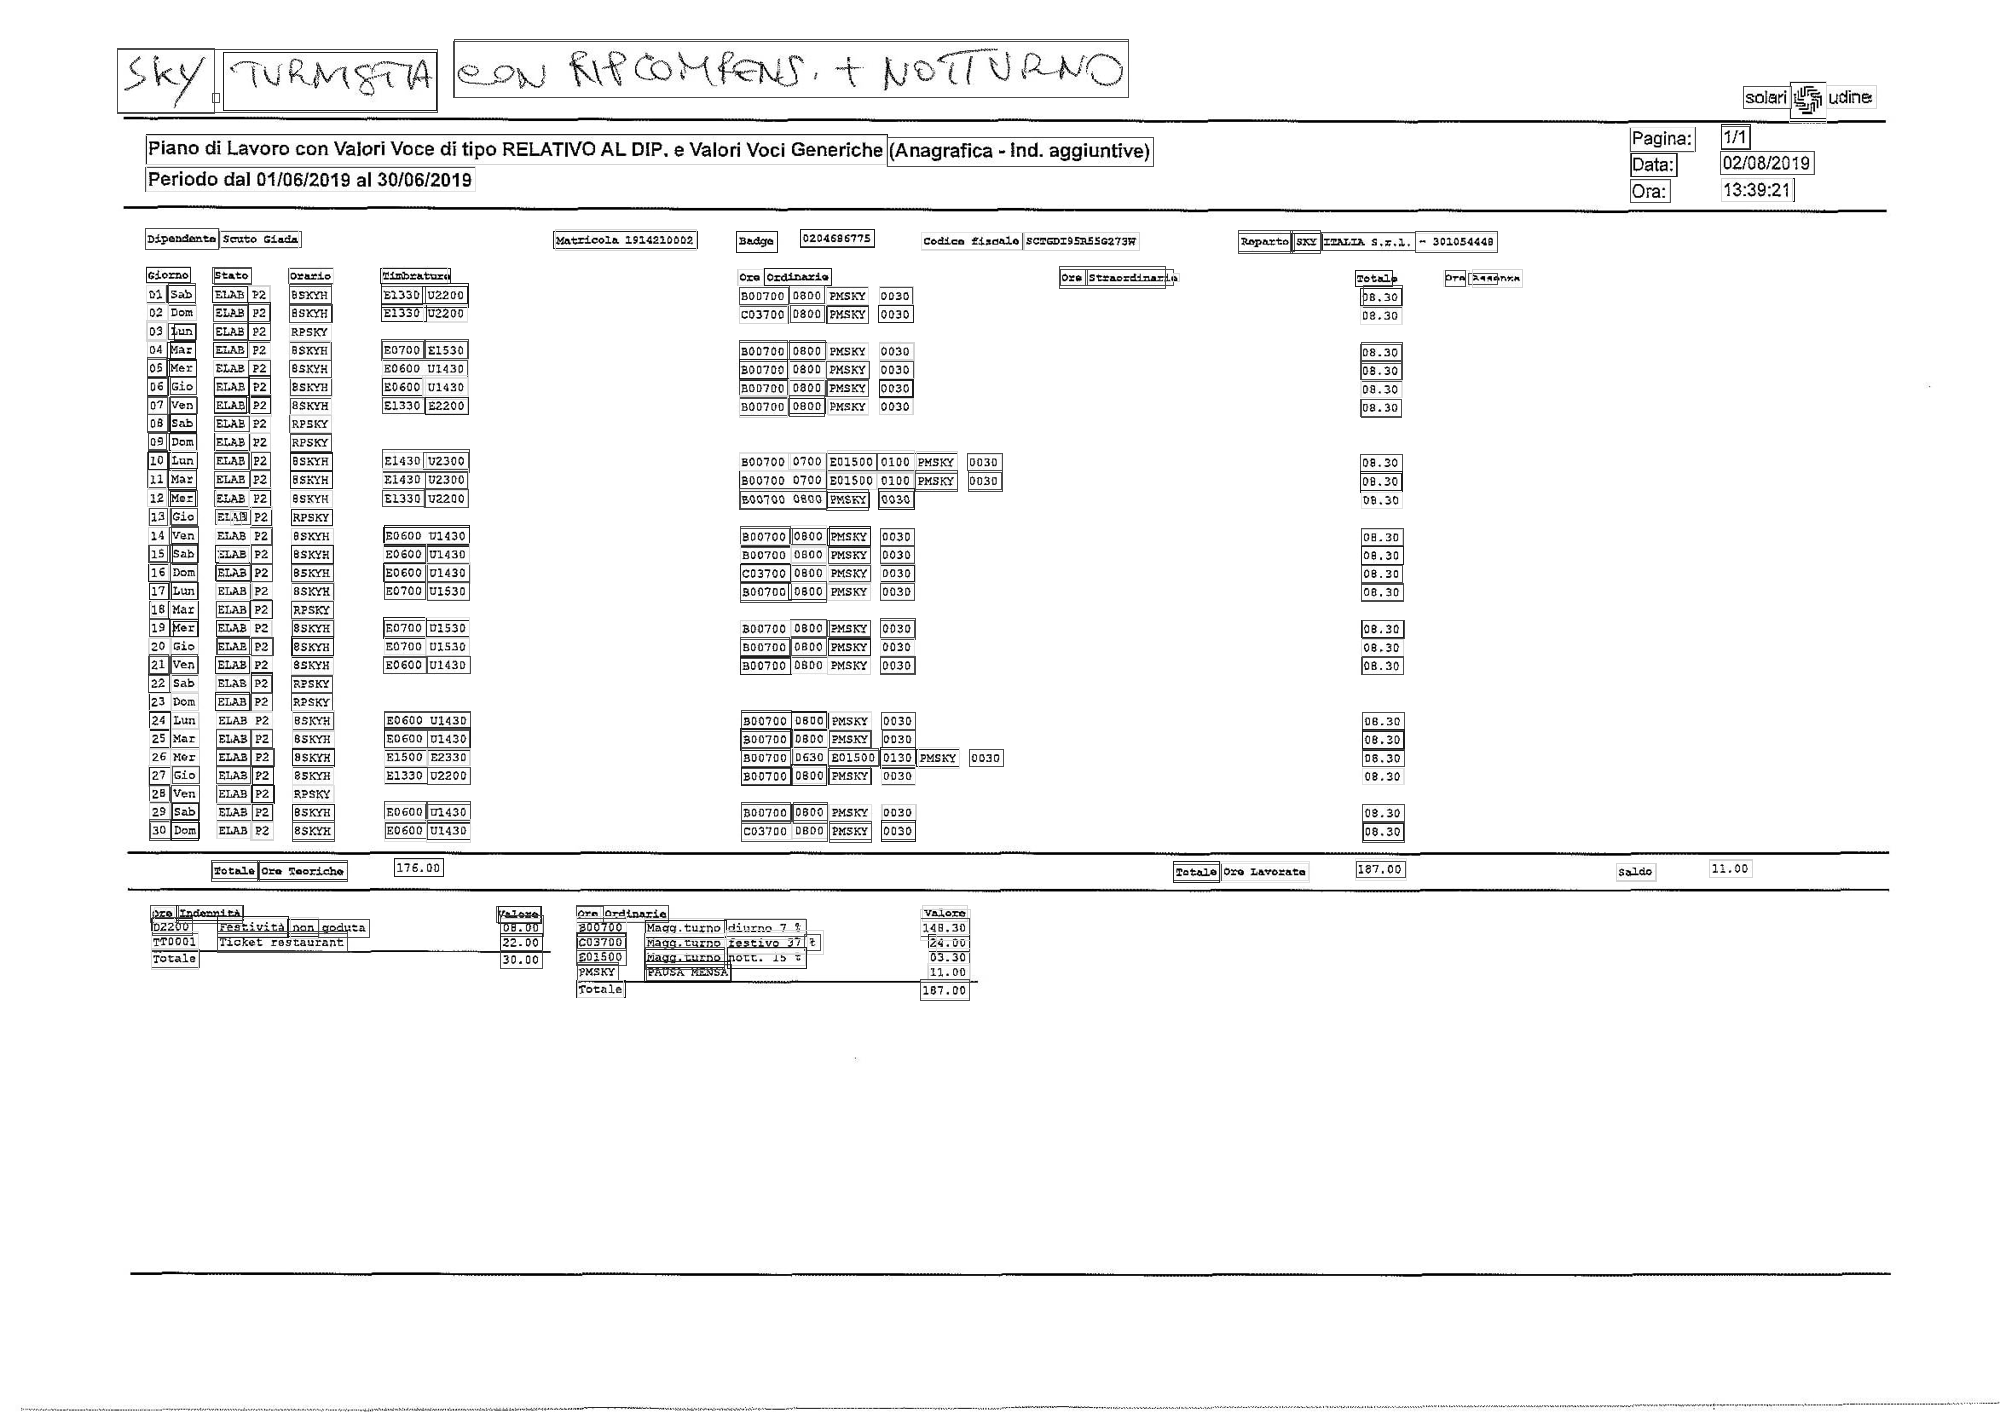

In [ ]:
#img_pil = Image.open("/content/Image_saved.png")
gray_pil = img_pil.convert("L")

rect_arr = detect(img_pil, FLAG_RECT)

img_draw = ImageDraw.Draw(img_pil)
colors = ['red', 'green', 'blue', "yellow", "pink"]

for i, rect in enumerate(rect_arr):
    x, y, w, h = rect
    img_draw.rectangle(
        (x, y, x + w, y + h),
        outline=colors[i % len(colors)])

img_pil

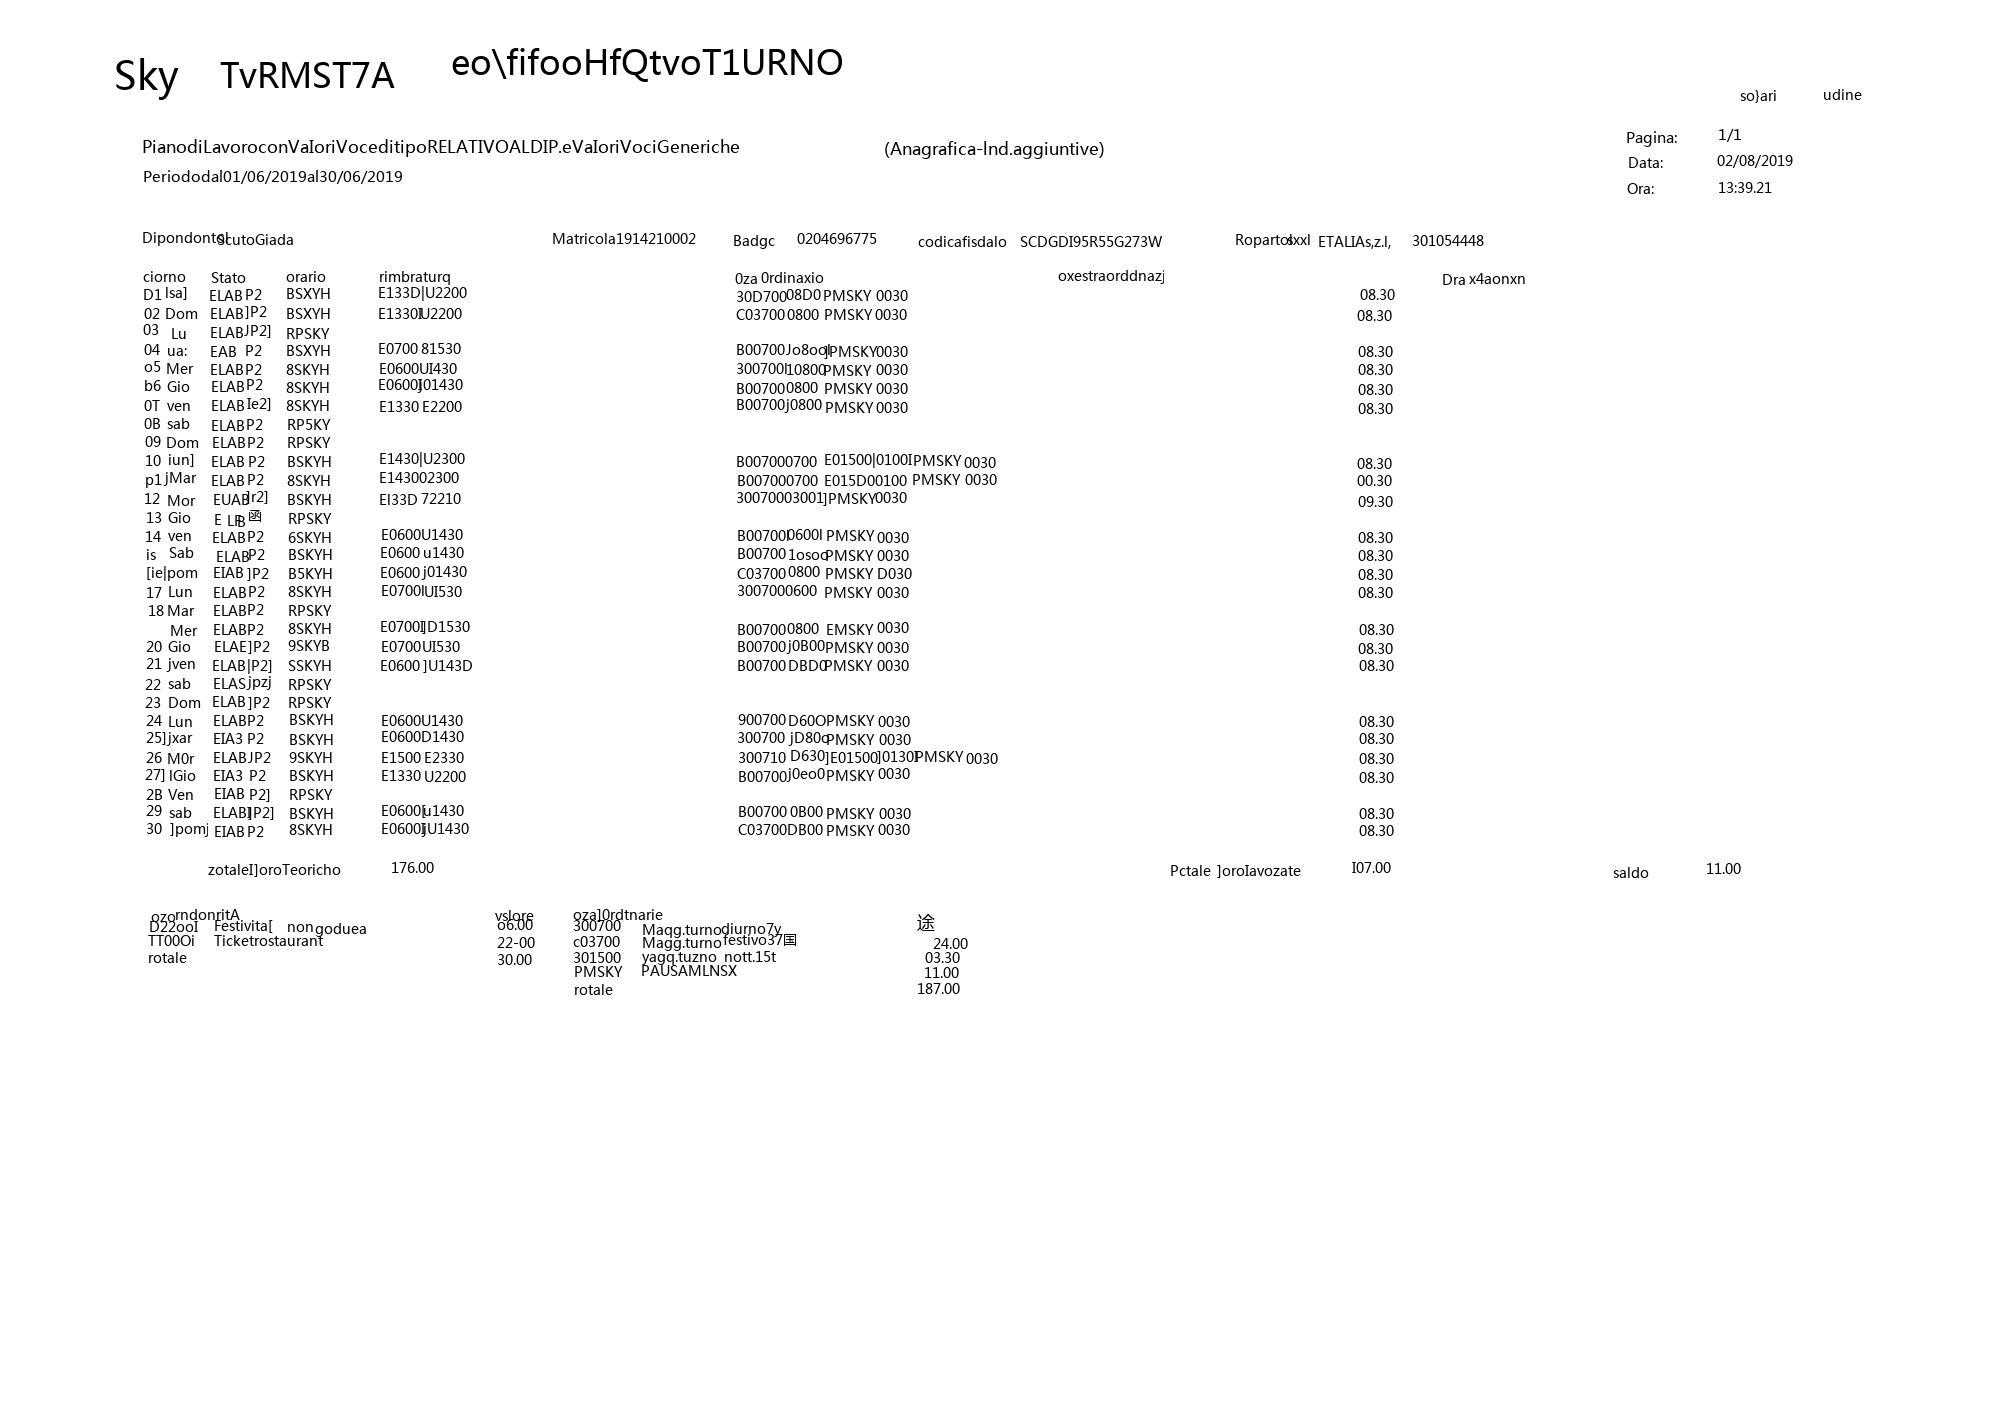

In [ ]:
blank_pil = Image.new("L", img_pil.size, 255)
blank_draw = ImageDraw.Draw(blank_pil)

results = run(gray_pil)
for line in results:
    x, y, w, h = line[0]
    txt = line[1]
    font = ImageFont.truetype("msyh.ttf", max(int(h * 0.6), 14))
    blank_draw.text(xy=(x, y), text=txt, font=font)

blank_pil

In [ ]:
# importing required modules 
import PyPDF2

# creating a pdf file object 
pdfFileObj = open('SincNet.pdf', 'rb') 

# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 

# printing number of pages in pdf file 
print(pdfReader.numPages) 

# creating a page object 
pageObj = pdfReader.getPage(0) 

# extracting text from page 
print(pageObj.extractText()+"   ") 

# closing the pdf file object 
pdfFileObj.close() 


8
SPEAKERRECOGNITIONFROMRAWWAVEFORMWITHSINCNET
MircoRavanelli,YoshuaBengio

Mila,Universit
´
edeMontr
´
eal,

CIFARFellow
ABSTRACT
Deeplearningisprogressivelygainingpopularityasaviable
alternativetoi-vectorsforspeakerrecognition.Promisingre-
sultshavebeenrecentlyobtainedwithConvolutionalNeural
Networks(CNNs)whenfedbyrawspeechsamplesdirectly.
Ratherthanemployingstandardhand-craftedfeatures,thelat-
terCNNslearnlow-levelspeechrepresentationsfromwave-
forms,potentiallyallowingthenetworktobettercaptureim-
portantnarrow-bandspeakercharacteristicssuchaspitchand
formants.Properdesignoftheneuralnetworkiscrucialto
achievethisgoal.
ThispaperproposesanovelCNNarchitecture,called
SincNet
,thatencouragestheconvolutionallayerto
discovermoremeaningfulSincNetisbasedon
parametrizedsincfunctions,whichimplementband-pass-
ters.IncontrasttostandardCNNs,thatlearnallelementsof
each,onlylowandhighcutofffrequenciesaredirectly
learnedfromdatawiththeproposedmethod.Thisoffersa
verycompactandefwaytoderiveacustomized